### NGUEKENG TIEUMENA MARC DONALD - ENSPY 

**IMPORT NECESSARY LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup



In [4]:

import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer



In [5]:
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
#pip install bert

In [ ]:
#pip install ktrain

**IMPORT DATASET**

In [6]:
imdb=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMDB/IMDB Dataset.csv')

Dataset to csv format

In [7]:
imdb

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


**PREPROCESSING**

Preprocessing is an important step in NLP tasks. It transforms text into a more digestible form so that machine learning algorithms can perform better.

**Text normalization and noise removal**

To remove stopwords

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Text normalization

In [9]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

Removing html strips and noise text

In [10]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
imdb['review']=imdb['review'].apply(denoise_text)

In [11]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
imdb['review']=imdb['review'].apply(remove_special_characters)

In [12]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
imdb['review']=imdb['review'].apply(simple_stemmer)

In [13]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)


{'have', 'but', 'them', 'just', 'will', 'couldn', "weren't", 'don', 'do', 'their', 'over', "she's", 'y', 'ours', 'same', 'on', 'so', 'are', 'being', 'because', 'to', 'can', 'you', "don't", 'such', 'were', 'itself', 'herself', 'why', 'shan', "wasn't", 'after', 'should', 'theirs', 'the', 'this', 'doing', 'is', 'd', 'o', 'or', 'now', 'having', 'has', 'ma', 'did', 'before', 'hasn', "mustn't", 'whom', 'am', 'against', 'your', 'how', 'by', 'mightn', 'me', 'himself', 'nor', 'than', 'she', 'when', 'haven', 'll', 'what', 's', 'my', 'his', 'wasn', "you've", 'mustn', 'weren', "you'd", 'him', 'while', 'of', 'where', 'until', "wouldn't", 'between', 'yourselves', "should've", 'does', 'as', 'up', 'those', "hadn't", 'its', 'no', 'further', 'yourself', 'below', 'under', 'at', 'myself', "shouldn't", 'only', 've', 'i', 'both', "mightn't", 'it', 'didn', 'then', 'ain', 'doesn', 'during', 'there', 'aren', 'needn', "you're", 'most', 'from', 'all', 'other', 'he', 'they', 'each', 'out', 'again', "didn't", 'dow

In [14]:

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
imdb['review']=imdb['review'].apply(remove_stopwords)

The dataset after these operations

In [15]:
imdb['review']

0        one review ha mention watch 1 Oz episod youll ...
1        wonder littl product film techniqu veri unassu...
2        thought thi wa wonder way spend time hot summe...
3        basic famili littl boy jake think zombi hi clo...
4        petter mattei love time money visual stun film...
                               ...                        
49995    thought thi movi right good job wasnt creativ ...
49996    bad plot bad dialogu bad act idiot direct anno...
49997    cathol taught parochi elementari school nun ta...
49998    Im go disagre previou comment side maltin thi ...
49999    one expect star trek movi high art fan expect ...
Name: review, Length: 50000, dtype: object

In [16]:
imdb.loc[0]['review']

'one review ha mention watch 1 Oz episod youll hook right thi exactli happen meth first thing struck Oz wa brutal unflinch scene violenc set right word GO trust thi show faint heart timid thi show pull punch regard drug sex violenc hardcor classic use wordit call OZ nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda Em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti wa surreal couldnt say wa readi watch develop tast Oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison exp

In [17]:
imdb

,review,sentiment
0,one review ha mention watch 1 Oz episod youll ...,positive
1,wonder littl product film techniqu veri unassu...,positive
2,thought thi wa wonder way spend time hot summe...,positive
3,basic famili littl boy jake think zombi hi clo...,negative
4,petter mattei love time money visual stun film...,positive
...,...,...
49995,thought thi movi right good job wasnt creativ ...,positive
49996,bad plot bad dialogu bad act idiot direct anno...,negative
49997,cathol taught parochi elementari school nun ta...,negative
49998,Im go disagre previou comment side maltin thi ...,negative


In [18]:
from sklearn.model_selection import train_test_split

# **FIRST APPROACH**

## LSTM WITH WORDS EMBEDDING

In [19]:
X=imdb['review'].to_numpy()

In [20]:
y=imdb['sentiment'].to_numpy()

In [21]:
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

Splitting of the dataset

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1)

In [23]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer

**Tokenization**

Tokenization is about splitting strings of text into smaller pieces, or “tokens”. Paragraphs can be tokenized into sentences and sentences can be tokenized into words.

We convert the sentences into word-to-index dictionary.
The tokenizer class of keras.preprocessing.text allows us to choose which words will be represented. So only those with particular frequencies will be used as dimensions of our vector space. 

In [24]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(xtrain)

Xtrain = tokenizer.texts_to_sequences(xtrain)
Xtest = tokenizer.texts_to_sequences(xtest)

This operation constitutes the words embedding


Let's see how the sentences are now represented

In [25]:
Xtrain

[[1,
  4,
  8,
  513,
  481,
  653,
  119,
  1803,
  178,
  212,
  103,
  15,
  72,
  20,
  858,
  68,
  4284,
  6,
  1822,
  3698,
  249,
  447,
  867,
  55,
  55,
  1449,
  51,
  12,
  756,
  89,
  27,
  316,
  320,
  1186,
  1240,
  11,
  206,
  313,
  55,
  365,
  56,
  1695,
  38,
  898,
  3735,
  487,
  151,
  525,
  807,
  2,
  296,
  4173,
  343,
  353,
  1639,
  1096,
  223,
  1157,
  275,
  1014,
  1036,
  86,
  786,
  354,
  734,
  2322,
  281,
  433,
  747,
  390,
  303,
  551,
  298,
  960,
  1096,
  923,
  270,
  35,
  298,
  58,
  319,
  88,
  298,
  58,
  3698,
  3931,
  4669,
  328],
 [155,
  123,
  899,
  697,
  917,
  25,
  159,
  312,
  994,
  3204,
  226,
  232,
  123,
  25,
  539,
  129,
  364,
  2848,
  1866,
  187,
  4001,
  345,
  658,
  1682,
  1274,
  906,
  1380,
  1122,
  2519,
  487,
  151,
  1578,
  3614,
  1477,
  3481,
  351,
  263],
 [734,
  1210,
  696,
  2,
  86,
  2712,
  20,
  508,
  97,
  119,
  2807,
  2727,
  1133,
  144,
  1847,
  1392,
  341,


The operation below give us vectors with different size.
We have to make them the same size

The following script finds the vocabulary size and then perform padding on both train and test set.

In [26]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

Xtrain = pad_sequences(Xtrain, padding='post', maxlen=maxlen)
Xtest = pad_sequences(Xtest, padding='post', maxlen=maxlen)

In [27]:
Xtrain.shape

(40000, 100)

40000 vectors with same size

**LSTM model building**

Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies.

They work tremendously well on a large variety of problems, and are now widely used.

LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn.

In [28]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

We will use l2 regularization to fix the overfitting problems

In [29]:
from keras.regularizers import l2

In [30]:
len(tokenizer.word_index)

156568

We use adam optimization for the learning rate

We also use dropout regularization

In [31]:
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=maxlen ))
model.add(LSTM(128, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01), dropout=0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [32]:
ytrain

array([0, 1, 1, ..., 0, 0, 1])

We split the set to have the validation set, which hepls us to choose the best hyperparameters

In [33]:
history = model.fit(Xtrain, ytrain, batch_size=128, epochs=4, verbose=1, validation_split=0.2)

Epoch 1/4
250/250 [==============================] - 13s 22ms/step - loss: 1.9652 - acc: 0.6098 - val_loss: 1.1513 - val_acc: 0.8531
Epoch 2/4
250/250 [==============================] - 5s 19ms/step - loss: 0.9358 - acc: 0.8726 - val_loss: 0.7860 - val_acc: 0.8687
Epoch 3/4
250/250 [==============================] - 5s 18ms/step - loss: 0.6364 - acc: 0.8958 - val_loss: 0.5928 - val_acc: 0.8696
Epoch 4/4
250/250 [==============================] - 5s 18ms/step - loss: 0.4699 - acc: 0.9039 - val_loss: 0.5012 - val_acc: 0.8608


Let us plot the loss and the accuracy

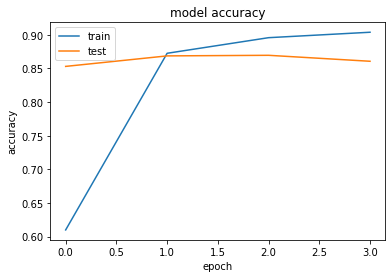

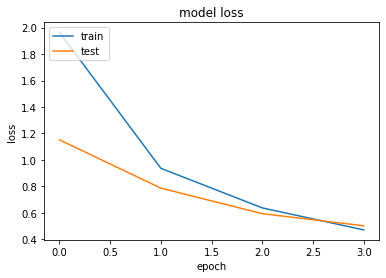

In [34]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [35]:
Xtest = tokenizer.texts_to_sequences(xtest)

In [36]:
Xtest = pad_sequences(Xtest, padding='post', maxlen=maxlen)

**Evaluation on test set**

In [37]:
score = model.evaluate(Xtest, ytest, verbose=1)

313/313 [==============================] - 2s 6ms/step - loss: 0.5022 - acc: 0.8623


## CONVOLUTIONAL NEURAL NETWORK

In [38]:
from keras.layers.convolutional import Conv1D

In [39]:
model = Sequential()

embedding_layer = Embedding(vocab_size, 100, input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Conv1D(128, 5, activation='relu'))

model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [40]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(xtrain)

Xtrain = tokenizer.texts_to_sequences(xtrain)
Xtest = tokenizer.texts_to_sequences(xtest)

In [41]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

Xtrain = pad_sequences(Xtrain, padding='post', maxlen=maxlen)
Xtest = pad_sequences(Xtest, padding='post', maxlen=maxlen)

In [42]:
history = model.fit(Xtrain, ytrain, batch_size=128, epochs=8, verbose=1, validation_split=0.2)

Epoch 1/8
250/250 [==============================] - 10s 5ms/step - loss: 0.6443 - acc: 0.6604 - val_loss: 0.5837 - val_acc: 0.7136
Epoch 2/8
250/250 [==============================] - 1s 4ms/step - loss: 0.5274 - acc: 0.7499 - val_loss: 0.5069 - val_acc: 0.7610
Epoch 3/8
250/250 [==============================] - 1s 4ms/step - loss: 0.4541 - acc: 0.7960 - val_loss: 0.4633 - val_acc: 0.7843
Epoch 4/8
250/250 [==============================] - 1s 4ms/step - loss: 0.4064 - acc: 0.8232 - val_loss: 0.4409 - val_acc: 0.7908
Epoch 5/8
250/250 [==============================] - 1s 4ms/step - loss: 0.3707 - acc: 0.8444 - val_loss: 0.4200 - val_acc: 0.8065
Epoch 6/8
250/250 [==============================] - 1s 4ms/step - loss: 0.3409 - acc: 0.8619 - val_loss: 0.4097 - val_acc: 0.8138
Epoch 7/8
250/250 [==============================] - 1s 4ms/step - loss: 0.3153 - acc: 0.8762 - val_loss: 0.4005 - val_acc: 0.8184
Epoch 8/8
250/250 [==============================] - 1s 4ms/step - loss: 0.2924 - 

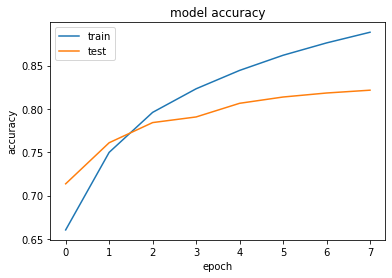

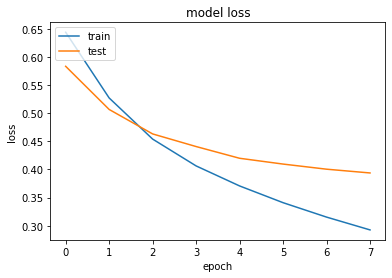

In [43]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [44]:
score = model.evaluate(Xtest, ytest, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.3840 - acc: 0.8230


# **BIDIRECTIONAL ENCODER REPRESENTATION FROM TRANSFORMERS (BERT) APPROACH**

## Pre-trained model BERT with ktrain

In [45]:
!pip install ktrain
!pip install bert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.3 MB 1.2 MB/s 
     |████████████████████████████████| 22.3 MB 1.2 MB/s 
     |████████████████████████████████| 981 kB 70.4 MB/s 
     |████████████████████████████████| 263 kB 70.5 MB/s 
     |████████████████████████████████| 2.8 MB 61.2 MB/s 
     |████████████████████████████████| 1.2 MB 59.7 MB/s 
     |████████████████████████████████| 468 kB 61.4 MB/s 
     |████████████████████████████████| 86 kB 5.6 MB/s 
     |████████████████████████████████| 3.3 MB 61.4 MB/s 
     |████████████████████████████████| 880 kB 71.6 MB/s 
     |████████████████████████████████| 596 kB 62.0 MB/s 
  Created wheel for ktrain: filename=ktrain-0.31.2-py3-none-any.whl size=25313063 sha256=ef7699ec27ffb4ef42b0ebbb3c377943096e7af40659aa9b48026134d00ae248
  Stored in directory: /root/.cache/pip/wheels/0a/b3/dd/512a01ea0b4f31d96163518b58361bb72d3bcb916d291052e7
  Cr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for bert: filename=bert-2.2.0-py3-none-any.whl size=3765 sha256=bcb4c987f737f231e04f265ea4dde61832aea142c7e5923a40e503172e252d3a
  Stored in directory: /root/.cache/pip/wheels/bb/31/1b/c05f362e347429b7436954d1a2280fe464731e8f569123a848
  Created wheel for erlastic: filename=erlastic-2.0.0-py3-none-any.whl size=6794 sha256=ffe585bafe62157ea631c4d2ec43e3782b5f0ce6ca430240741a4af011f75cc4
  Stored in directory: /root/.cache/pip/wheels/94/f1/b4/0b98b1e94775da6a0b1130e342d22af05cd269e1172c19f40f
Successfully built bert erlastic


In [46]:
#split the dataset  
#train datasetta
train=imdb[:40000]

#test dataset
test=imdb[40000:]
print(train.shape,test.shape)

(40000, 2) (10000, 2)


In [47]:
#important librairies for bert training
import ktrain
from ktrain import text

In [48]:
#Split train and test data with bert 
(X_train,y_train),(X_test,y_test),preprocess=text.texts_from_df(train_df=train,
 text_column='review',
 label_columns='sentiment',
 val_df=test,
 maxlen=400,
 preprocess_mode='bert')

['negative', 'positive']
   negative  positive
0       0.0       1.0
1       0.0       1.0
2       0.0       1.0
3       1.0       0.0
4       0.0       1.0
['negative', 'positive']
       negative  positive
40000       1.0       0.0
40001       1.0       0.0
40002       1.0       0.0
40003       1.0       0.0
40004       1.0       0.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [49]:
X_train[0].shape

(40000, 400)

In [50]:
#here it is the model that will be trained and it prescribes us if it is a multi-label classsification or not and the maximum length of the sentences
model= text.text_classifier(name='bert',
                            train_data=(X_train,y_train),
                            preproc=preprocess)

Is Multi-Label? False
maxlen is 400
done.


Note that if a sentence is too long or longer than the defined maximum length it will be truncated and if it is too short its vector will be filled with zeros. All this to avoid having an unbalanced data set

In [ ]:
# get optimal learning rate(this might take days to run)
#learner.lr_find()
#learner.lr_plot()
#Optimal learning rate for this is 2e-5

In [51]:
# Get Learning Rate
learner=ktrain.get_learner(model=model,
                           train_data=(X_train,y_train),
                           val_data=(X_test, y_test),
                           batch_size=6)

In [ ]:
# this fit take a lot of time so we train on 1 epochs to prevent also the over fit but we can compile it on 3 max epochs
history=learner.fit_onecycle(lr=2e-5, epochs=1)



begin training using onecycle policy with max lr of 2e-05...
5297/6667 [======================>.......] - ETA: 14:37 - loss: 0.3644 - accuracy: 0.8352

The error above is not actually an error, our model has actually finished its calculations on all epochs; just that at the end there is a kind of infinite loop that does not stop the model so we stop it manually

In [ ]:
#compute the predictor 
predictor=ktrain.get_predictor(learner.model,preprocess)

In [ ]:
data=['this movie was horrible. the plot was really boring. Acting was okay. thouht',
      'the film really sucked. there is no plot and acting was bad',
      'what a beautiful movie. great plot, great acting. will see it again']

In [ ]:
# run the predictor on new data 
predictor.predict(data)

In [ ]:
#save the model
predictor.save('/content/drive/MyDrive/Colab Notebooks/IMDB')